In [120]:
import numpy as np
import matplotlib.pyplot as plt

# 간단한 SGD

In [121]:
data_sample = np.random.uniform(-2,2,size=10)

def loss(x):
    return x**2

def gradien(x):
    return 2*x

In [122]:
def sgd(lr=0.1,epochs = 10):
    w = np.random.uniform(-2,2)
    history=[w]

    for _ in range(epochs):
        sample = np.random.choice(data_sample)
        grad = gradien(sample)
        w -= lr * grad
        history.append(w)
    return history



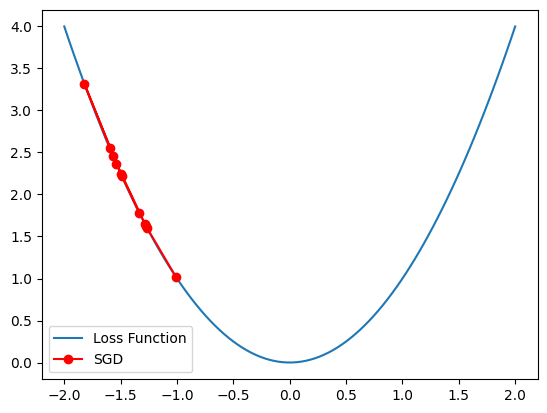

In [123]:
history = sgd()
x_vals = np.linspace(-2,2,100)
plt.plot(x_vals,loss(x_vals),label='Loss Function')
plt.plot(history,loss(np.array(history)),'ro-',label='SGD')
plt.legend()
plt.show()


### 모멘텀 추가

In [124]:
def sgd_momentum(lr=0.1,momentum = 0.9,epochs=10):
    w = np.random.uniform(-2,2)
    v = 0
    history = [w]
    
    for _ in range(epochs):
        grad = gradien(w)
        v= momentum *v -lr *grad
        w +=v
        history.append(w)

    return history

    
        

# 학습률에 따른 SGD

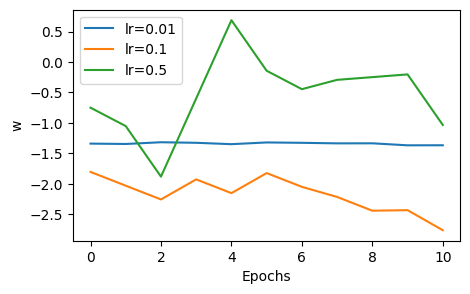

In [125]:
learning_rates = [0.01,0.1,0.5]
histories = [sgd(lr) for lr in learning_rates]

plt.figure(figsize=(5,3))

for i,history in enumerate(histories):
    plt.plot(history,label=f'lr={learning_rates[i]}')

plt.xlabel('Epochs')
plt.ylabel('w')
plt.legend()
plt.show()

# AdaGrad

In [126]:
def adagrad(lr=0.1,epsilon = 1e-8, epochs = 10):
    w = np.random.uniform(-2,2)
    h = 0
    history = [w]
    

    for _ in range(epochs):
        grad = gradien(w)
        h += grad**2
        w -= (lr/(np.sqrt(h) + epsilon)) * grad
        history.append(w)
    return history



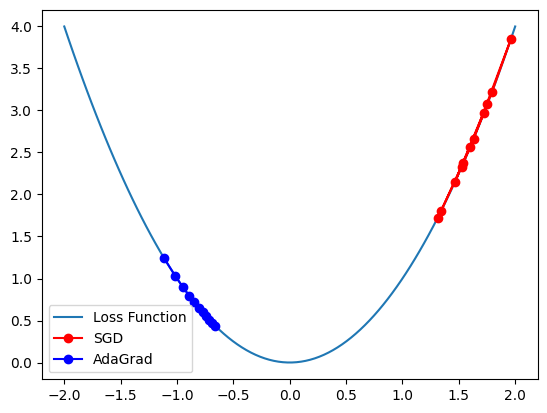

In [146]:
sgd_history = sgd()
adagrad_history = adagrad()

x_vals = np.linspace(-2,2,100)

plt.plot(x_vals,loss(x_vals),label='Loss Function')

plt.plot(sgd_history,loss(np.array(sgd_history)),'ro-',label='SGD')
plt.plot(adagrad_history,loss(np.array(adagrad_history)),'bo-',label='AdaGrad')
plt.legend()
plt.show()
    

### RMSprop

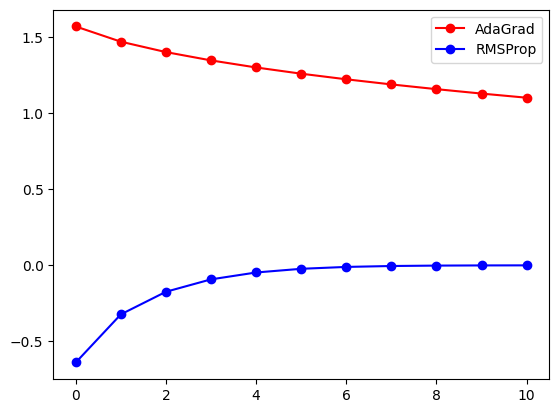

In [165]:
def rmsprop(lr=0.1,beta=0.9,epsilon=1e-8,epochs=10):
    w = np.random.uniform(-2,2)
    h = 0
    history = [w]

    for _ in range(epochs):
        grad = gradien(w)
        h = beta * h + (1-beta) * grad**2
        w -= (lr/(np.sqrt(h) + epsilon)) * grad
        history.append(w)
    return history

adagrad_history = adagrad()
rmsprop_history = rmsprop()

plt.plot(range(11),adagrad_history,'ro-',label='AdaGrad')
plt.plot(range(11),rmsprop_history,'bo-',label='RMSProp')
plt.legend()
plt.show()






### Adam

In [167]:
def adam(lr=0.1,beta1=0.9,beta2=0.999,epsilon=1e-8,epochs=10):
    w = np.random.uniform(-2,2)
    m = 0
    v = 0
    history = [w]

    for t in range(1,epochs+1):
        grad = gradien(w)

        m = beta1 * m + (1-beta1) * grad
        v = beta2 * v + (1-beta2) * grad**2
        m_hat = m / (1-beta1**t)
        v_hat = v / (1-beta2**t)
        w -= (lr/(np.sqrt(v_hat) + epsilon)) * m_hat
        history.append(w)
    return history

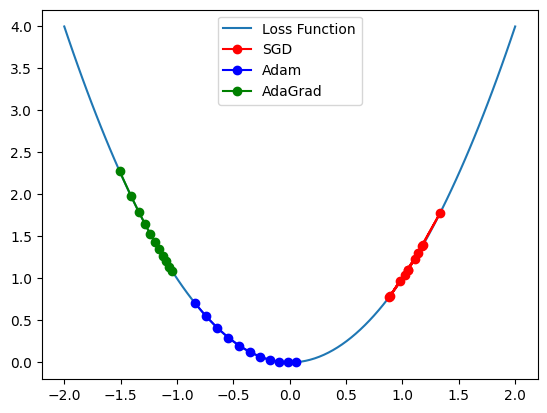

In [169]:
sgd_history = sgd()
adagrad_history = adagrad()
adam_history = adam()

x_vals = np.linspace(-2,2,100)

plt.plot(x_vals,loss(x_vals),label='Loss Function')

plt.plot(sgd_history,loss(np.array(sgd_history)),'ro-',label='SGD')
plt.plot(adam_history,loss(np.array(adam_history)),'bo-',label='Adam')
plt.plot(adagrad_history,loss(np.array(adagrad_history)),'go-',label='AdaGrad')
plt.legend()
plt.show()








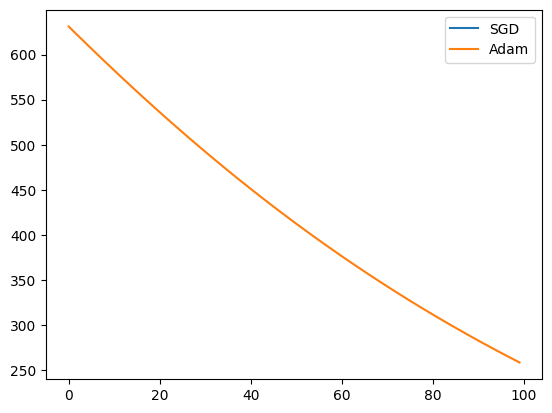

In [173]:
import torch
import torch.nn as nn
import torch.optim as optim

torch.manual_seed(42)
X = torch.randn(100,1)*10
y = 3*X + 5 + torch.randn(100,1)

model_sgd = nn.Linear(1,1)
model_adam = nn.Linear(1,1)

criterion = nn.MSELoss()
optimizer_sgd = optim.SGD(model_sgd.parameters(),lr=0.01)
optim_adam = optim.Adam(model_adam.parameters(),lr=0.01)

epochs =100
losses_sgd = []
losses_adam = []

for epoch in range(epochs):
    optimizer_sgd.zero_grad()
    outputs = model_adam(X)
    loss = criterion(outputs,y)
    loss.backward()
    optimizer_sgd.step()
    losses_sgd.append(loss.item())

for epoch in range(epochs):
    optim_adam.zero_grad()
    outputs = model_adam(X)
    loss = criterion(outputs,y)
    loss.backward()
    optim_adam.step()
    losses_adam.append(loss.item())
plt.plot(losses_sgd,label='SGD')
plt.plot(losses_adam,label='Adam')
plt.legend()
plt.show()



    